# Dataset Creation Scripts

Here we will elaborate a random line samples generator for our hough line peak extraction model. We need to first generate random lines, followed by random noise and then apply hough transform to get our desired prediction label.

## Imports

In [287]:
import random
import math
import numpy as np
from skimage import draw
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.transform import hough_line, hough_line_peaks
import cv2 as cv
%matplotlib inline


## Aux Functions

In [288]:
def random_coords(width, height):
    return int(random.random() * width), int(random.random() * height)


In [289]:
def draw_random_lines(numLines, image, dims):
    for _ in range(numLines):
        x0, y0 = random_coords(dims[0], dims[1])
        x1, y1 = random_coords(dims[0], dims[1])
        image[draw.line(x0, y0, x1, y1)] = 255

    return image


In [290]:
def draw_bezier_noise(numNoise, image, dims):
    for _ in range(numNoise):
        r0, c0 = random_coords(dims[0], dims[1])
        r1, c1 = random_coords(dims[0], dims[1])
        r2, c2 = random_coords(dims[0], dims[1])
        image[draw.bezier_curve(r0, c0, r1, c1, r2, c2, 0.5)] = 255
    return image


In [291]:
def generate_image(numLines=1, numNoise=1, dims=(200, 200)):
    blank = np.zeros(dims)
    img = draw_random_lines(numLines, blank, dims)
    img = draw_bezier_noise(numNoise, img, dims)
    return img.astype('uint8')


In [292]:
def get_hough_lines(image):
    coords = []
    # Standard Hough Line Transform
    lines = cv.HoughLines(image, 1, np.pi / 180, 20, None, 0, 0)
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            coords.append((rho, theta))
        return coords
    else:
        print('no line detected')
        return -1


In [293]:
def draw_hough_lines(image, lines):
    result = np.zeros(image.shape)
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(result, pt1, pt2, (255,255,255), 1, cv.LINE_AA)
        plt.imshow(result, cmap=cm.gray)
    else:
        print('no lines detected')    


In [294]:
def get_hough_transform(image, theta=None):
    if theta is not None:
        tested_angles = theta
    else:
        tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)

    h, theta, d = hough_line(image, theta=tested_angles)
    angle_step = 0.5 * np.diff(theta).mean()
    d_step = 0.5 * np.diff(d).mean()
    bounds = [np.rad2deg(theta[0] - angle_step),
              np.rad2deg(theta[-1] + angle_step),
              d[-1] + d_step, d[0] - d_step]

    ht = np.log(1 + h)
    return ht


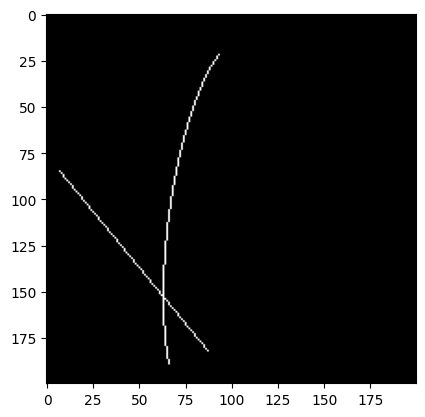

In [308]:
img = generate_image()
plt.imshow(img, cmap=cm.gray)

In [296]:
lines = get_hough_lines(img)
print(lines)

[(182.0, 1.5358897), (180.0, 1.553343), (122.0, 1.6755161), (124.0, 1.6580628), (126.0, 1.6406095), (120.0, 1.6929693), (178.0, 1.5707964), (179.0, 1.5882496), (183.0, 1.5184364), (176.0, 1.5882496), (117.0, 1.7104226), (178.0, 1.6057029), (128.0, 1.6231562), (187.0, 1.5009831), (114.0, 1.727876), (185.0, 1.4835298)]


In [297]:
ht = get_hough_transform(img)

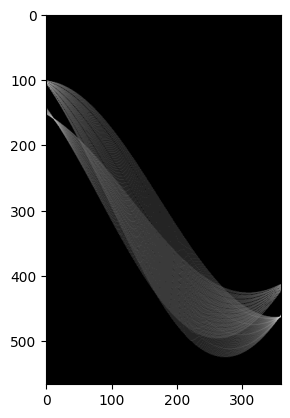

In [298]:
plt.imshow(ht, cmap=cm.gray)
